### import packs

In [425]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from os import path
import PIL
from PIL import Image
import nltk
import string
import re
import random
from collections import Counter
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize 
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')

### read in the file and filter what I want to use

In [2]:
ms = pd.read_csv("/Users/amiip/Desktop/2021W/PR_Erschliessung_mittelalterlicher_Musikhandschriften_der_OENB/A-Wn_1890.csv")

In [76]:
ms

,siglum,marginalia,folio,sequence,feast,office,genre,position,cantus_id,finalis,fulltext_standardized,image_link,cao_concordances,node_id
0,A-Wn 1890,NaN,001r,1,Dom. 1 Adventus,V,A,M,002527,NaN,Ecce nomen domini venit de longinquo et clarit...,https://digital.onb.ac.at/RepViewer/viewer.fac...,CGBEMVHR FS,548587
1,A-Wn 1890,NaN,001r,2,Dom. 1 Adventus,M,I,NaN,001149,NaN,Regem venturum dominum venite adoremus,https://digital.onb.ac.at/RepViewer/viewer.fac...,CGBE VHR,548588
2,A-Wn 1890,NaN,001r,3,Dom. 1 Adventus,M,A,1.,003134,NaN,Hora est jam nos de somno surgere et aperti su...,https://digital.onb.ac.at/RepViewer/viewer.fac...,BE R,548589
3,A-Wn 1890,NaN,001r,4,Dom. 1 Adventus,M,W,1.,NaN,NaN,-- --,https://digital.onb.ac.at/RepViewer/viewer.fac...,NaN,548590
4,A-Wn 1890,NaN,001r,5,Dom. 1 Adventus,M,R,1.1,006129,NaN,Aspiciens a longe ecce video dei potentiam ven...,https://digital.onb.ac.at/RepViewer/viewer.fac...,GBEMVHRDFS,548591
5,A-Wn 1890,NaN,001v,1,Dom. 1 Adventus,M,V,01,006129a,NaN,Quique terrigenae et filii hominum simul in un...,https://digital.onb.ac.at/RepViewer/viewer.fac...,GBEMVHRDFS,548592
6,A-Wn 1890,NaN,001v,2,Dom. 1 Adventus,M,V,02,006129b,NaN,Qui regis Israel intende qui deducis velut ove...,https://digital.onb.ac.at/RepViewer/viewer.fac...,GBEMVHRDF,548593
7,A-Wn 1890,NaN,001v,3,Dom. 1 Adventus,M,V,03,006129c,NaN,Tollite portas principes vestras et elevamini ...,https://digital.onb.ac.at/RepViewer/viewer.fac...,BEMVHR S,548594
8,A-Wn 1890,NaN,001v,4,Dom. 1 Adventus,M,R,1.2,006128,NaN,Aspiciebam in visu noctis et ecce in nubibus c...,https://digital.onb.ac.at/RepViewer/viewer.fac...,GBEMVHRDFS,548595
9,A-Wn 1890,NaN,001v,5,Dom. 1 Adventus,M,V,01,006128a,NaN,Ecce dominator dominus cum virtute veniet,https://digital.onb.ac.at/RepViewer/viewer.fac...,BEM HRD,548596


In [4]:
ms.dropna(axis="rows", subset=["fulltext_standardized"], inplace=True)
ms["fulltext_standardized"] += " "

texts = ms["fulltext_standardized"].sum()
#texts
print(len(texts))

In [74]:
#ms.info()

In [80]:
# filter chants: only Advent+Christmas (first Advent Sunday (=Dom. 1. Adventus) until 25.12.)
ms_adv = ms[1:511]
texts_adv = ms_adv["fulltext_standardized"].sum()
print(len(texts_adv))

39227


In [310]:
# filter chants: only Lent/fasting period before Easter (Ash Wednesday until saturday before Easter Sunday)
ms_lent = ms[1928:2535]
texts_lent = ms_lent["fulltext_standardized"].sum()
print(len(texts_lent))

52023


In [309]:
# filter chants: only Easter (Easter Sunday until before Whitsun)
ms_east = ms[2535:3264]
texts_east = ms_east["fulltext_standardized"].sum()
print(len(texts_east))

43997


In [82]:
# probably irrelevant

#ms.drop('incipit', axis=1, inplace=True)
#ms.drop('mode', axis=1, inplace=True)
#ms.drop('fulltext_ms', axis=1, inplace=True)
#ms.drop('extra', axis=1, inplace=True)
#ms.drop('addendum', axis=1, inplace=True)
#ms.drop('melody_id', axis=1, inplace=True)
#ms

### clean texts and remove stop words:

In [63]:
cleaned_texts = texts.lower()
cleaned_texts = re.sub("\* ", "", cleaned_texts) # get rid of *
cleaned_texts = re.sub("\-", "", cleaned_texts) # get rid of -
cleaned_texts = re.sub(' +',' ', cleaned_texts) # get rid of multiple spaces
cleaned_texts = re.sub('\.','', cleaned_texts) # get rid of .
print(len(cleaned_texts))
#print(cleaned_texts)

372885


In [50]:
stop_words = (["a","ab","ac","ad","at","atque","aut","autem","cum","de","dum","e","erant","erat","est","et","etiam",
"ex","haec","hic","hoc","in","ita","me","nec","neque","non","per","qua","quae","quam","qui","quibus","quidem","quo",
"quod","re","rebus","rem","res","sed","si","sic","sunt","tamen","tandem","te","ut","vel"])
# latin stopwords from https://github.com/WorldBrain/remove-stopwords

word_tokens = word_tokenize(cleaned_texts) 
    
filtered_list = [] 
for w in word_tokens: 
    if w not in stop_words: 
        filtered_list.append(w) 
#filtered_list

In [93]:
list_words = cleaned_texts.split()
list_words = [l.strip().lower() for l in filtered_list]

list_words[0:10]

['ecce',
 'nomen',
 'domini',
 'venit',
 'longinquo',
 'claritas',
 'ejus',
 'replet',
 'orbem',
 'terrarum']

In [92]:
# Counting frequency of words
freqdist = Counter(list_words)
freqdist.most_common(10)

[('alleluia', 1126),
 ('dominus', 456),
 ('domine', 420),
 ('ejus', 374),
 ('deus', 315),
 ('quia', 311),
 ('dei', 285),
 ('eum', 258),
 ('domini', 214),
 ('dominum', 207)]

In [91]:
# finding occurances of one specific word, e.g. "alleluia"
expression = 'alleluia'
pos = 0 
positions = []

while pos != -1:
    position = cleaned_texts.find(expression,pos+1)
    pos = position
    positions.append(position)
positions.pop()
print('The expression is found {} times'.format(len(positions)))
#print(positions)

The expression is found 1174 times


In [49]:
# finding context around the word alleluia
tknzr = nltk.tokenize.WordPunctTokenizer()
tokens = tknzr.tokenize(cleaned_texts)
tokens = [token for token in tokens if token not in stop_words]
nltk_text = nltk.Text(tokens)

nltk_text.concordance(expression.lower(), width=60, lines=10)

Displaying 10 of 1126 matches:
nem colles fluent lac mel alleluia jucundare filia sion exsu
lta satis filia jerusalem alleluia ecce dominus veniet omnes
o erit die illa lux magna alleluia omnes sitientes venientes
e dominum inveniri potest alleluia ecce veniet propheta magn
 ipse renovabit jerusalem alleluia super jerusalem orietur d
 habebis utero filium dei alleluia sede dextristu exsurgens 
e concipies paries filium alleluia regem venturumangelus dom
e concepit spiritu sancto alleluia venturus veniet tardabit 
lem respice orientem vide alleluia antequam convenirent inve
ria habens spiritu sancto alleluia quaerite dominum inveniri


In [47]:
# words that often appear with alleluia in the same context
nltk_text.similar(expression)

r noster domine domino jam caelo sion sancti patre super laetitia
venit alleluiaalleluia exaltare sanctus annuntiandum
velamentofulgebunt subito facta hominibus


### same for Advent, Lent and Easter:

In [312]:
cleaned_texts_adv = texts_adv.lower()
cleaned_texts_adv = re.sub("\* ", "", cleaned_texts_adv) # get rid of *
cleaned_texts_adv = re.sub("\-", "", cleaned_texts_adv) # get rid of -
cleaned_texts_adv = re.sub(' +',' ', cleaned_texts_adv) # get rid of multiple spaces
cleaned_texts_adv = re.sub('\.','', cleaned_texts_adv) # get rid of .
print(len(cleaned_texts_adv))
#print(cleaned_texts_adv)

39005


In [314]:
cleaned_texts_lent = texts_lent.lower()
cleaned_texts_lent = re.sub("\* ", "", cleaned_texts_lent) # get rid of *
cleaned_texts_lent = re.sub("\-", "", cleaned_texts_lent) # get rid of -
cleaned_texts_lent = re.sub(' +',' ', cleaned_texts_lent) # get rid of multiple spaces
cleaned_texts_lent = re.sub('\.','', cleaned_texts_lent) # get rid of .
print(len(cleaned_texts_lent))
#print(cleaned_texts_lent)

51907


In [315]:
cleaned_texts_east = texts_east.lower()
cleaned_texts_east = re.sub("\* ", "", cleaned_texts_east) # get rid of *
cleaned_texts_east = re.sub("\-", "", cleaned_texts_east) # get rid of -
cleaned_texts_east = re.sub(' +',' ', cleaned_texts_east) # get rid of multiple spaces
cleaned_texts_east = re.sub('\.','', cleaned_texts_east) # get rid of .
print(len(cleaned_texts_east))
#print(cleaned_texts_east)

43383


In [316]:
word_tokens_adv = word_tokenize(cleaned_texts_adv) 
word_tokens_lent = word_tokenize(cleaned_texts_lent) 
word_tokens_east = word_tokenize(cleaned_texts_east) 
    
filtered_list_adv = [] 
for w in word_tokens_adv: 
    if w not in stop_words: 
        filtered_list_adv.append(w) 
filtered_list_lent = [] 
for w in word_tokens_lent: 
    if w not in stop_words: 
        filtered_list_lent.append(w) 
filtered_list_east = [] 
for w in word_tokens_east: 
    if w not in stop_words: 
        filtered_list_east.append(w) 
#filtered_list_adv
#filtered_list_lent
#filtered_list_east

In [321]:
list_words_adv = cleaned_texts_adv.split()
list_words_adv = [l.strip().lower() for l in filtered_list_adv]
list_words_lent = cleaned_texts_lent.split()
list_words_lent = [l.strip().lower() for l in filtered_list_lent]
list_words_east = cleaned_texts_east.split()
list_words_east = [l.strip().lower() for l in filtered_list_east]

#list_words_adv[0:10]
#list_words_lent[0:10]
#list_words_east[0:10]

['regem',
 'venturum',
 'dominum',
 'venite',
 'adoremus',
 'hora',
 'jam',
 'nos',
 'somno',
 'surgere']

In [366]:
# Counting frequency of words
freqdist_adv = Counter(list_words_adv)
freqdist_lent = Counter(list_words_lent)
freqdist_east = Counter(list_words_east)
#freqdist_adv.most_common(10)
#freqdist_lent.most_common(10)
freqdist_east.most_common(10)

[('alleluia', 791),
 ('dominus', 49),
 ('ego', 40),
 ('vobis', 39),
 ('eum', 39),
 ('quia', 33),
 ('ejus', 31),
 ('sicut', 29),
 ('surrexit', 29),
 ('super', 27)]

## Trying to visualize my results

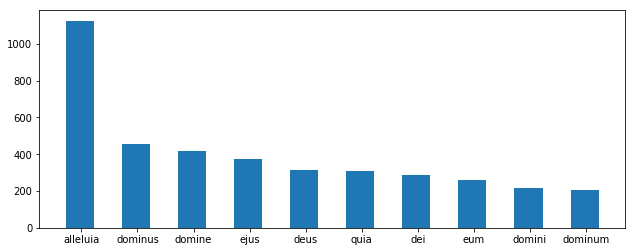

In [394]:
labels, values = zip(*freqdist.most_common(10))

indexes = np.arange(len(labels))
width = 0.5

plt.bar(indexes, values, width)
fig = plt.gcf()
fig.set_size_inches(10.5, 4)
plt.xticks(indexes + width * 0.05, labels)
plt.show()

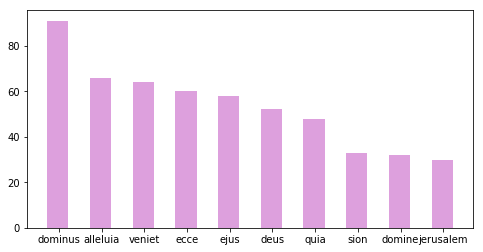

In [424]:
labels_adv, values_adv = zip(*freqdist_adv.most_common(10))

indexes_adv = np.arange(len(labels_adv))
width = 0.5

plt.bar(indexes_adv, values_adv, width, color="plum")
fig = plt.gcf()
fig.set_size_inches(8, 4)
plt.xticks(indexes_adv + width * 0.05, labels_adv)
plt.show()

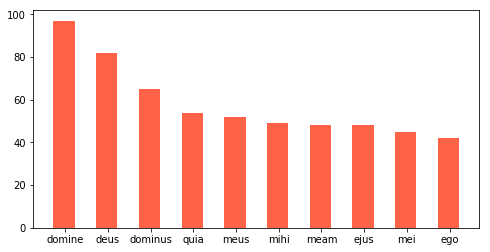

In [405]:
labels_lent, values_lent = zip(*freqdist_lent.most_common(10))

indexes_lent = np.arange(len(labels_lent))
width = 0.5

plt.bar(indexes_lent, values_lent, width, color="tomato")
fig = plt.gcf()
fig.set_size_inches(8, 4)
plt.xticks(indexes_lent + width * 0.05, labels_lent)
plt.show()

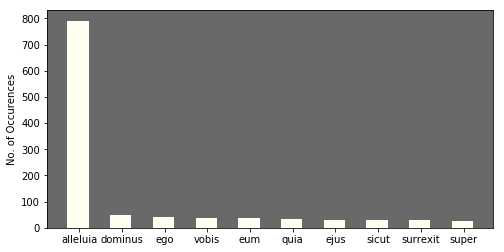

In [420]:
labels_east, values_east = zip(*freqdist_east.most_common(10))

indexes_east = np.arange(len(labels_east))
width = 0.5

plt.bar(indexes_east, values_east, width, color = "ivory")
fig = plt.gcf()
fig.set_size_inches(8, 4)
plt.xticks(indexes_east + width * 0.05, labels_east)
plt.ylabel("No. of Occurences")
ax = plt.axes()
ax.set_facecolor("dimgrey")
plt.show()

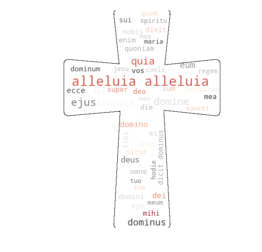

<Figure size 432x288 with 0 Axes>

In [271]:
mask = np.array(Image.open("cross.png"))

cleaned = ' '.join(list_words)
wordcloud = WordCloud(max_words = 50, mask=mask, background_color="white", colormap="RdGy", contour_color="black", contour_width=1).generate(cleaned)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

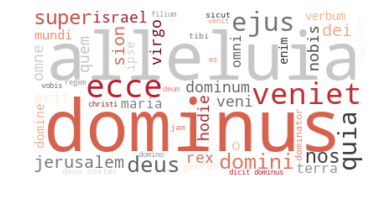

In [355]:
cleaned = ' '.join(list_words_adv)
wordcloud = WordCloud(max_words = 50, background_color="white", colormap="RdGy").generate(cleaned)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

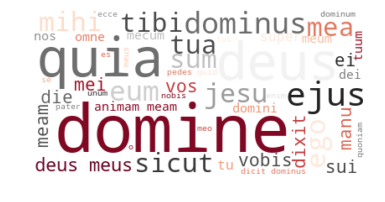

In [354]:
cleaned = ' '.join(list_words_lent)
wordcloud = WordCloud(max_words = 50, background_color="white", colormap="RdGy").generate(cleaned)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

# it's noticable how the word alleluia isn't appearing as in all the other plots (since it's not a "happy" time for the church)

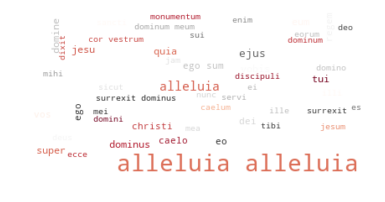

In [365]:
cleaned = ' '.join(list_words_east)
wordcloud = WordCloud(max_words = 50, background_color="white", colormap="RdGy_r").generate(cleaned)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()